In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [89]:
# Generate skewed dataset
def generate_skewed_dataset(size=100, noise_level=20):
    np.random.seed(42)
    black_data = np.random.normal(50, noise_level, 20)  # Small "black" cluster
    white_data = np.random.normal(200, noise_level, 80)  # Large "white" cluster
    dataset = np.concatenate((black_data, white_data))
    np.random.shuffle(dataset)
    return dataset

# Perform DBSCAN clustering
def classify_data_with_dbscan(data, eps=20, min_samples=5):
    data_reshaped = data.reshape(-1, 1)  # Reshape for DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_reshaped)
    return labels

In [90]:
# Calculate Centroids
def calculate_centroids(data, labels):
    unique_labels = set(labels) - {-1}  # Exclude noise (-1)
    centroids = {}
    for label in unique_labels:
        cluster_points = data[labels == label]
        centroids[label] = np.mean(cluster_points)
    return centroids

In [91]:
# Plot results
def plot_dbscan_results(data, labels, centroids):
    plt.figure(figsize=(10, 6))
    print(centroids)
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_data = data[labels == label]
        plt.scatter(cluster_data, [label] * len(cluster_data), label=f'Cluster {label}')
    
    # Plot centroids
    for label, centroid in centroids.items():
        print(f"Centroid for cluster {label}: {centroid}")
        plt.scatter(centroid, label, label=f'Centroid {label}', marker='x', color='red' if label == 0 else 'blue')
        plt.scatter(centroid, 0.5, label=f'Centroid {label}', marker='x', color='red' if label == 0 else 'blue')
    
    
    plt.title("DBSCAN Clustering for Skewed Classes")
    plt.xlabel("Sensor Readings")
    plt.ylabel("Clusters")
    plt.legend()
    plt.show()

In [92]:
# Generate dataset
dataset = generate_skewed_dataset(size=100)

# Perform DBSCAN clustering
labels = classify_data_with_dbscan(dataset, eps=20, min_samples=3)

print("Number of clusters: ", labels.shape)
print("Number of points in cluster 0: ", np.size(np.where(labels == 0)))
print("Number of points in cluster 1: ", np.size(np.where(labels == 1)))

# Compute centroids
centroids = calculate_centroids(dataset, labels)

print("Centroid of cluster 0: ", centroids[0])
print("Centroid of cluster 1: ", centroids[1])

Number of clusters:  (100,)
Number of points in cluster 0:  80
Number of points in cluster 1:  20
Centroid of cluster 0:  198.2603298723568
Centroid of cluster 1:  46.57402877116343


{np.int64(0): np.float64(198.2603298723568), np.int64(1): np.float64(46.57402877116343)}
Centroid for cluster 0: 198.2603298723568
Centroid for cluster 1: 46.57402877116343


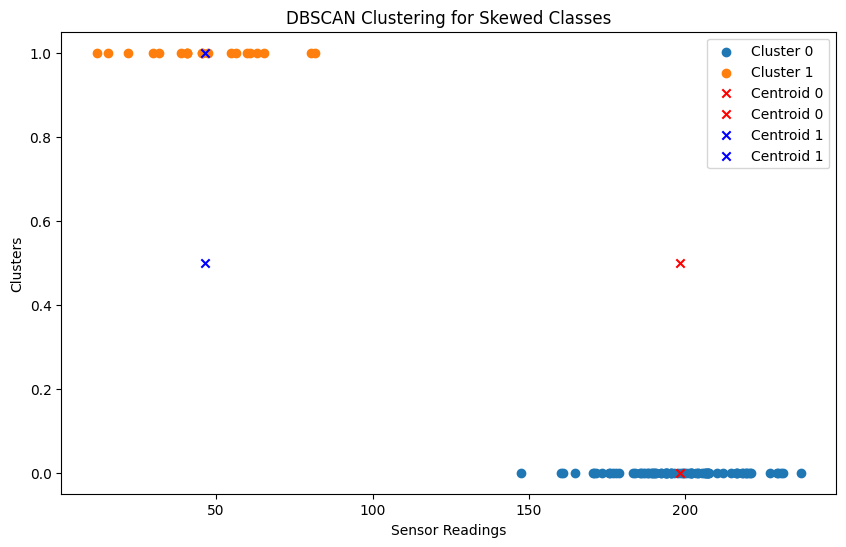

In [93]:
# Plot results
plot_dbscan_results(dataset, labels, centroids)

# Display dataset and labels for verification
# dataset, labels
